In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

## 台灣鳳梨基本情報

- **2011~2019 產量＆種植面積（折線-產量(ton)、直方-種植面積(公頃)）**

<img src="image/Pineapple area & production.jpg" width=500 height=500>

- **2011~ 2020 全國市場年度價格＆交易量（折線-價格(NTD/kg)、直方-交易量(kg)）**

<img src="image/全國鳳梨各年度價格＆交易量.jpg" width=1500 height=1200>


### 相關文章 


### 目前問題＆重點

### 讀取檔案

In [7]:
df = pd.read_csv("analysis data/台中_鳳梨合併資料(價格&天氣).csv")
df.head()

,日期,Market,Product,High price,Mid price,Low price,Average price,Volume(kg),Price change rate,Volume change rate,...,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount
0,2011-01-01,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,17.3,12.0,17.0,17027,0.00,0.00,...,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,5,1.3
1,2011-01-02,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,18.1,11.7,17.4,23476,0.02,0.38,...,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,6,1.7
2,2011-01-03,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,18.1,11.7,17.4,23476,0.00,0.00,...,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,3,8.8
3,2011-01-04,400 台中市,B2 鳳梨 金鑽鳳梨,20.7,16.2,10.8,17.6,51764,0.01,1.20,...,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,6,5.8
4,2011-01-05,400 台中市,B2 鳳梨 金鑽鳳梨,20.0,16.9,10.0,17.5,11247,-0.01,-0.78,...,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,6,7.0


In [5]:
df_pineapple_analysis = pd.read_csv('../資料清洗/交易相關/pineapple整併分析資料/台中市分析資料.csv')
df_pineapple_analysis

,日期,pineapple_平均價,pineapple_交易量,甜蜜蜜_平均價,watermelon_平均價,pineapple_前日平均價,pineapple_5日平均價
0,2011-01-01,17.0,17027.0,11.0,18.0,17.0,17.4
1,2011-01-02,17.4,23476.0,11.0,16.4,17.0,17.4
2,2011-01-03,17.5,37620.0,11.0,14.8,17.4,17.4
3,2011-01-04,17.6,51764.0,11.0,13.2,17.5,17.4
4,2011-01-05,17.5,11247.0,11.0,14.1,17.6,17.4
...,...,...,...,...,...,...,...
3813,2021-06-10,21.0,163380.0,10.0,15.6,21.3,20.8
3814,2021-06-11,21.1,87697.0,5.7,15.2,21.0,21.0
3815,2021-06-12,20.3,82402.0,5.7,15.9,21.1,20.9
3816,2021-06-13,19.4,85591.0,5.7,14.8,20.3,20.6


In [9]:
df_pineapple = pd.merge(df_pineapple_analysis, df, on="日期", how="inner").drop(columns=["Market", "Product", "Price change rate", "Volume change rate", "Average price", "Volume(kg)"])
df_pineapple.head()

,日期,pineapple_平均價,pineapple_交易量,甜蜜蜜_平均價,watermelon_平均價,pineapple_前日平均價,pineapple_5日平均價,High price,Mid price,Low price,...,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount
0,2011-01-01,17.0,17027.0,11.0,18.0,17.0,17.4,21.2,17.3,12.0,...,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,5,1.3
1,2011-01-02,17.4,23476.0,11.0,16.4,17.0,17.4,21.2,18.1,11.7,...,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,6,1.7
2,2011-01-03,17.5,37620.0,11.0,14.8,17.4,17.4,21.2,18.1,11.7,...,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,3,8.8
3,2011-01-04,17.6,51764.0,11.0,13.2,17.5,17.4,20.7,16.2,10.8,...,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,6,5.8
4,2011-01-05,17.5,11247.0,11.0,14.1,17.6,17.4,20.0,16.9,10.0,...,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,6,7.0


#### 讀取過後，資料型態被自動轉換 => 再次轉換回來

In [10]:
df_pineapple[['WD', 'WDGust', 'WSGust', 'UVI Max']] = df_pineapple[['WD', 'WDGust', 'WSGust', 'UVI Max']].astype("object")
df_pineapple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   日期               3818 non-null   object 
 1   pineapple_平均價    3818 non-null   float64
 2   pineapple_交易量    3818 non-null   float64
 3   甜蜜蜜_平均價          3818 non-null   float64
 4   watermelon_平均價   3818 non-null   float64
 5   pineapple_前日平均價  3818 non-null   float64
 6   pineapple_5日平均價  3818 non-null   float64
 7   High price       3818 non-null   float64
 8   Mid price        3818 non-null   float64
 9   Low price        3818 non-null   float64
 10  StnPres          3818 non-null   float64
 11  SeaPres          3818 non-null   float64
 12  StnPresMax       3818 non-null   float64
 13  StnPresMin       3818 non-null   float64
 14  Temperature      3818 non-null   float64
 15  T Max            3818 non-null   float64
 16  T Min            3818 non-null   float64
 17  Td dew point  

In [12]:
df_pineapple.columns = ['日期', 'pineapple_avg', 'pineapple_volume', 'sweetpineapple_avg', 'watermelon_avg',
                        'pineapple_avg(-1d)', 'pineapple_avg(5d)', 'High price', 'Mid price',
                        'Low price', 'StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin',
                        'Temperature', 'T Max', 'T Min', 'Td dew point', 'RH', 'RHMin', 'WS',
                        'WD', 'WSGust', 'WDGust', 'Precp', 'PrecpHour', 'PrecpMax10',
                        'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean',
                        'EvapA', 'UVI Max', 'Cloud Amount']

### 數值型資料（Numerical data distribution）

In [16]:
df_num = df_pineapple.select_dtypes(include=["int64", "float64"])
df_num

,pineapple_avg,pineapple_volume,sweetpineapple_avg,watermelon_avg,pineapple_avg(-1d),pineapple_avg(5d),High price,Mid price,Low price,StnPres,...,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
0,17.0,17027.0,11.0,18.0,17.0,17.4,21.2,17.3,12.0,903.2,...,0.0,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,1.3
1,17.4,23476.0,11.0,16.4,17.0,17.4,21.2,18.1,11.7,905.0,...,0.0,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,1.7
2,17.5,37620.0,11.0,14.8,17.4,17.4,21.2,18.1,11.7,904.4,...,0.0,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,8.8
3,17.6,51764.0,11.0,13.2,17.5,17.4,20.7,16.2,10.8,904.7,...,0.0,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,5.8
4,17.5,11247.0,11.0,14.1,17.6,17.4,20.0,16.9,10.0,904.5,...,0.5,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,21.0,163380.0,10.0,15.6,21.3,20.8,29.0,18.2,9.7,898.6,...,22.0,6.2,2.5,6.0,4.4,32.5,16.21,22.5,-2.8,7.2
3814,21.1,87697.0,5.7,15.2,21.0,21.0,28.5,17.8,8.0,899.3,...,0.5,0.3,0.5,0.5,3.8,28.1,16.23,25.5,-2.0,7.5
3815,20.3,82402.0,5.7,15.9,21.1,20.9,28.0,15.2,5.7,901.7,...,22.5,6.2,7.5,14.5,2.8,20.7,14.51,7.5,-3.1,7.8
3816,19.4,85591.0,5.7,14.8,20.3,20.6,26.5,16.1,7.4,901.4,...,13.0,1.7,5.5,11.5,4.9,35.4,20.10,22.5,-3.9,6.2


In [17]:
# 變換欄位順序 => 把average price拉出來放在最後一欄
col_target = list(df_num["pineapple_avg"])
df_num.drop(columns="pineapple_avg", inplace=True)
df_num.insert(29, "pineapple_avg", col_target)

C:\Users\Tibame\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df_num

,pineapple_volume,sweetpineapple_avg,watermelon_avg,pineapple_avg(-1d),pineapple_avg(5d),High price,Mid price,Low price,StnPres,SeaPres,...,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount,pineapple_avg
0,17027.0,11.0,18.0,17.0,17.4,21.2,17.3,12.0,903.2,1517.6,...,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,1.3,17.0
1,23476.0,11.0,16.4,17.0,17.4,21.2,18.1,11.7,905.0,1533.4,...,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,1.7,17.4
2,37620.0,11.0,14.8,17.4,17.4,21.2,18.1,11.7,904.4,1528.6,...,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,8.8,17.5
3,51764.0,11.0,13.2,17.5,17.4,20.7,16.2,10.8,904.7,1532.7,...,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,5.8,17.6
4,11247.0,11.0,14.1,17.6,17.4,20.0,16.9,10.0,904.5,1535.5,...,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,7.0,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,163380.0,10.0,15.6,21.3,20.8,29.0,18.2,9.7,898.6,1493.7,...,6.2,2.5,6.0,4.4,32.5,16.21,22.5,-2.8,7.2,21.0
3814,87697.0,5.7,15.2,21.0,21.0,28.5,17.8,8.0,899.3,1502.2,...,0.3,0.5,0.5,3.8,28.1,16.23,25.5,-2.0,7.5,21.1
3815,82402.0,5.7,15.9,21.1,20.9,28.0,15.2,5.7,901.7,1524.9,...,6.2,7.5,14.5,2.8,20.7,14.51,7.5,-3.1,7.8,20.3
3816,85591.0,5.7,14.8,20.3,20.6,26.5,16.1,7.4,901.4,1522.1,...,1.7,5.5,11.5,4.9,35.4,20.10,22.5,-3.9,6.2,19.4


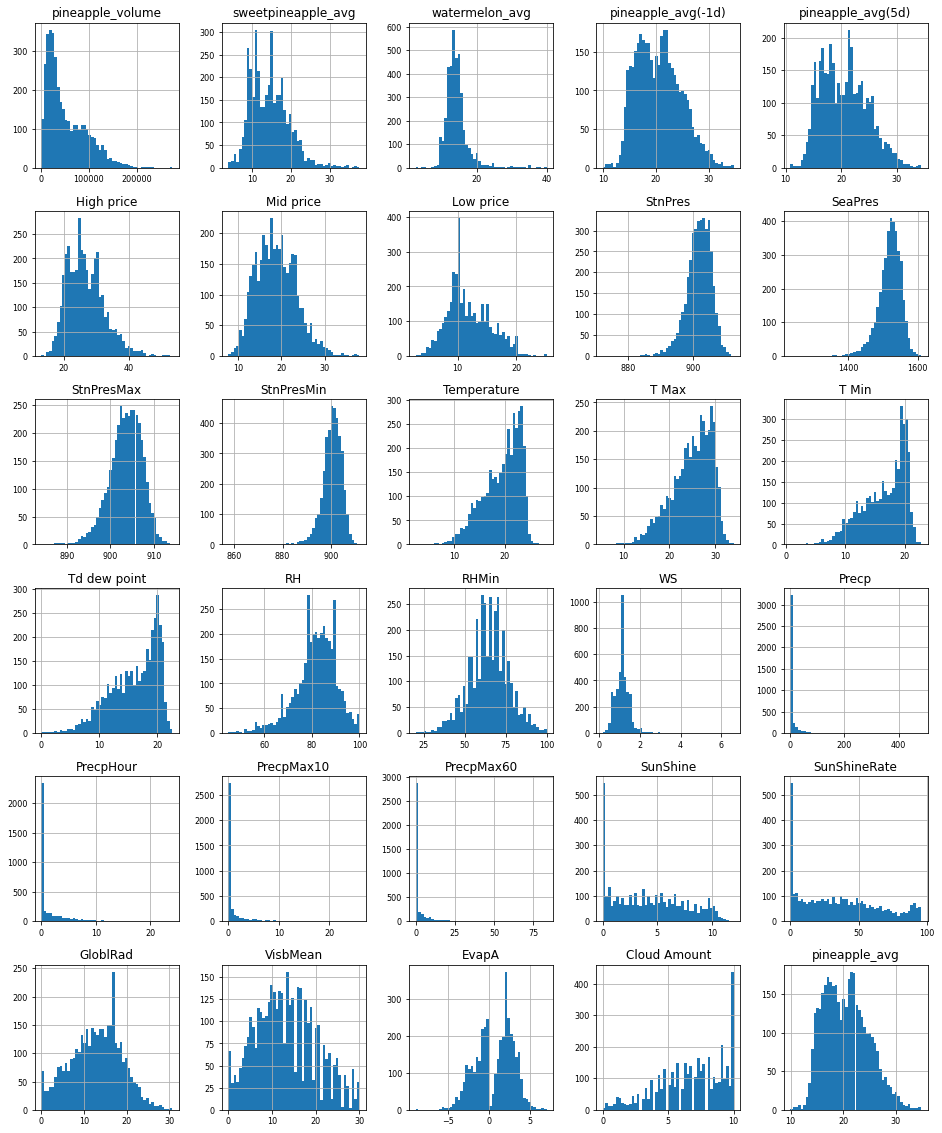

In [19]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [21]:
df_num_corr = df_num.corr()["pineapple_avg"][:-1]
df_num_corr
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
golden_features_list

pineapple_avg(5d)     0.970668
pineapple_avg(-1d)    0.961218
Mid price             0.872824
High price            0.834933
Low price             0.718152
sweetpineapple_avg    0.468957
Name: pineapple_avg, dtype: float64

#### 相關係數（Correlation）

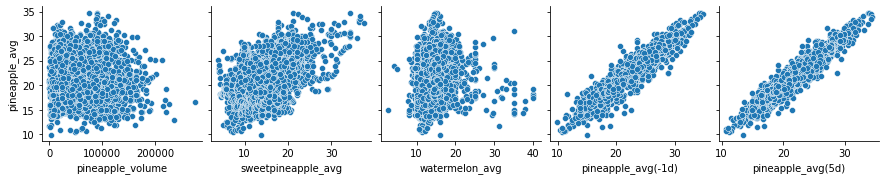

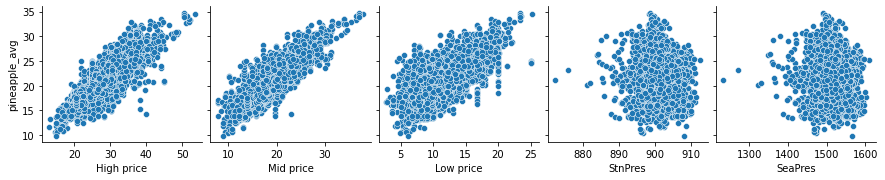

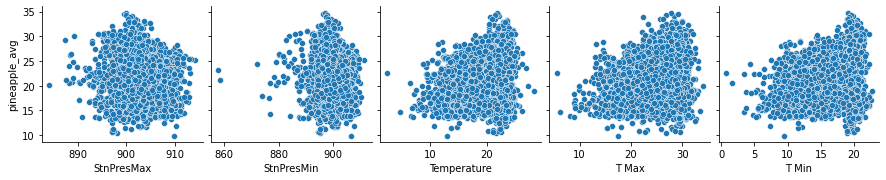

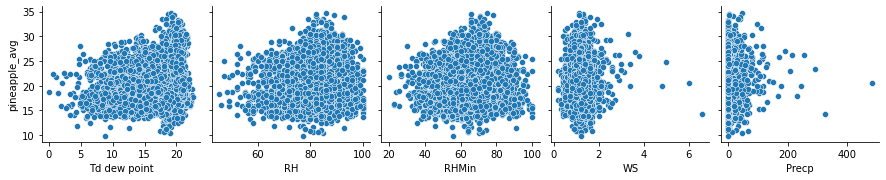

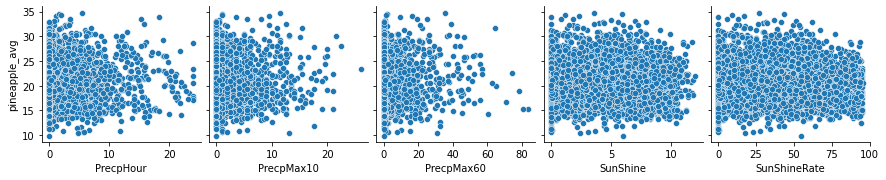

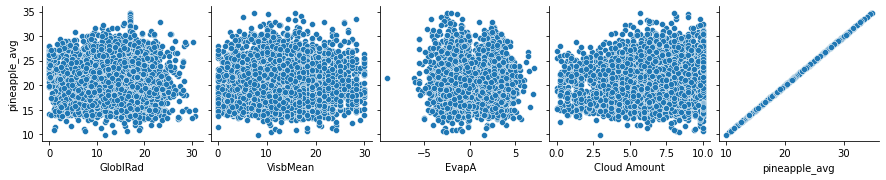

In [23]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, diag_kind=None,
                x_vars=df_num.columns[i:i+5],
                y_vars=['pineapple_avg'])

### Feature to feature relationship

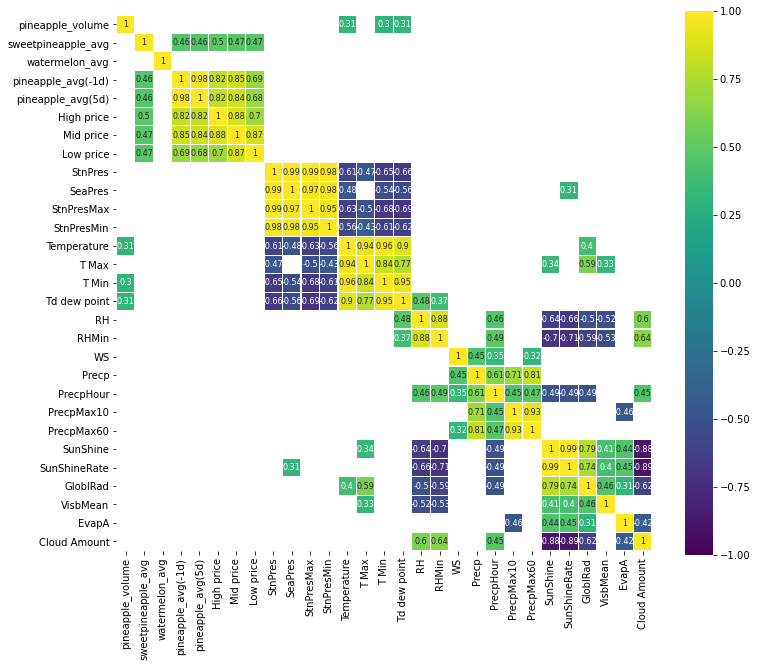

In [24]:
corr = df_num.drop('pineapple_avg', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);

### VIF(Variance Inflation Factor) => 用以判斷是否為高度共線性

- 何謂共線性: 當2個（或以上）的自變數互不獨立(即彼此相關)，就是具有「共線性」。「共線性」會使迴歸模型中存在著重複的自變數，提高某一自變數的解釋力與預測力，使得理論的建構不正確
- 多元回歸時，兩兩變數的相關係數參考性降低，必須仰賴輔助回歸判定係數
- 一般 VIF 值越大，認為共線性越強。在實務上認為，若最大的 VIF 超過 10，則變數間存在著**嚴重的共線性**。
- 公式：

<img src="image/vif formula.png" width=500 height=500>

[高度共線性 (high degree of multicollinearity) 問題的診斷: VIF 算法](https://www.youtube.com/watch?v=q_PjZOkPR90)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# demo範例
df_123= pd.DataFrame({'a': [1, 2, 3, 4, 5],
'b': [2, 2, 3, 2, 1],
'c': [4, 6, 7, 8, 9],
'd': [4, 3, 4, 5, 4]})

X= StandardScaler().fit_transform(df_123)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['columns'] = df_123.columns
vif

,VIF Factor,columns
0,135.0,a
1,3.0,b
2,111.0,c
3,3.0,d


In [26]:
X.shape[1]

4

In [29]:
X = StandardScaler().fit_transform(df_num)
X

array([[-0.85180313, -0.71153062,  1.1743078 , ...,  0.49537078,
        -2.158094  , -0.84132118],
       [-0.69568914, -0.71153062,  0.67295465, ...,  0.58348901,
        -1.99897071, -0.74643552],
       [-0.35329866, -0.71153062,  0.17160151, ..., -0.12145683,
         0.8254677 , -0.72271411],
       ...,
       [ 0.73076034, -1.80466472,  0.5162818 , ..., -1.66352586,
         0.42765947, -0.05851448],
       [ 0.80795797, -1.80466472,  0.17160151, ..., -2.01599878,
        -0.20883369, -0.27200722],
       [-0.22603998, -1.80466472,  0.07759779, ...,  1.55278954,
        -0.36795698, -0.31945005]])

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['columns'] = df_num.columns
vif

,VIF Factor,columns
0,1.928127,pineapple_volume
1,1.524712,sweetpineapple_avg
2,1.068363,watermelon_avg
3,27.806235,pineapple_avg(-1d)
4,36.960964,pineapple_avg(5d)
5,7.211952,High price
6,13.147082,Mid price
7,4.979835,Low price
8,2263.081904,StnPres
9,1648.029869,SeaPres


#### 待釐清
- 了解意義
- 是否準確

### 時間序列分析

In [31]:
df_pineapple["日期"] = pd.to_datetime(df_pineapple["日期"])

<AxesSubplot:xlabel='日期'>

C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


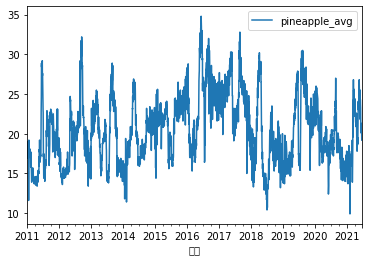

In [32]:
df_pineapple.plot(x="日期", y="pineapple_avg")

In [33]:
df_pineapple.dtypes

日期                    datetime64[ns]
pineapple_avg                float64
pineapple_volume             float64
sweetpineapple_avg           float64
watermelon_avg               float64
pineapple_avg(-1d)           float64
pineapple_avg(5d)            float64
High price                   float64
Mid price                    float64
Low price                    float64
StnPres                      float64
SeaPres                      float64
StnPresMax                   float64
StnPresMin                   float64
Temperature                  float64
T Max                        float64
T Min                        float64
Td dew point                 float64
RH                             int64
RHMin                          int64
WS                           float64
WD                            object
WSGust                        object
WDGust                        object
Precp                        float64
PrecpHour                    float64
PrecpMax10                   float64
P